# 2.0 Data Cleaning, Preprocessing, EDA

**Data Preprocessing**
1. Cleaning and removal of punctuations
2. Tokenization to break down sentences to words with nltk 
3. Removing stopwords and numbers
4. Lemmatization 
5. Do feature extraction using word-embedding techniques such as TF-IDF and CountVectorizer

In [7]:
# usual libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from wordcloud import WordCloud, ImageColorGenerator

# libraries for data preprocessing
import nltk
import re
from nltk.tokenize import word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer

# libraries for vectorization
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# libraries for model selection
from sklearn.model_selection import train_test_split

# this setting widens how many characters pandas will display in a column:
pd.options.display.max_colwidth = 400

# this setting widens how many characters pandas will display in a row:
pd.set_option('display.max_rows', 100)

In [3]:
# include this for the laptop
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [5]:
# install wordcloud into dsi-sg kernel
pip install wordcloud

SyntaxError: invalid syntax (2691199477.py, line 2)

In [8]:
# load data
coffee_df = pd.read_csv('./dataset/coffee.csv', names=['index','message'])
tea_df = pd.read_csv('./dataset/tea.csv', names=['index','message'])

In [9]:
# check coffee_df imports
coffee_df.tail()

,index,message
1515,1514.0,"I've been drinking coffee for 10+ years, my whole adult life, but pretty much only pre-ground with a drip machine, the standard way in my country. The most exotic setup I had was a french press. Couple of years ago my wife bought a food processor with an included blade grinder unit and I tried it a couple of times, but it was a hassle so I didn't really stick with it."
1516,1515.0,"Then, about a month ago, YouTube recommended me Wired's Coffee Support with James Hoffman, and I fell down the rabbit hole. fast forward a month, and I bought myself a Wilfa grinder, an AeroPress and some decent beans (not specialty yet), and I made the best cup of coffee I've ever made at home."
1517,1516.0,"The thing is, I hadn't searched anything coffee related in a long time, yet I was recommended the video. I don't believe it was a coincidence. That (along with the fact Wired made an episode about coffee) makes me think there's a bigger trend going on, or about to come."
1518,1517.0,"I'd like to hear from the community veterans, or even industry professionals. Have newcomers like myself started pouring in (no pun intended) recently? Or perhaps there has been a steady growth over a longer period of time? Any ideas what could have caused it? Any other interesting trends/changes you have noticed? I would also like to hear the stories of other newcomers."
1519,1518.0,Thanks and have a great day!


In [10]:
# check for null values and drop them
coffee_df['message'].isnull().sum()

1

In [11]:
coffee_df['message']=coffee_df['message'].dropna()

In [12]:
# check the shape for coffee_df
coffee_df.shape

(1520, 2)

In [13]:
# check tea_df imports
tea_df.tail(10)

,index,message
1496,1495.0,"Reasonably adjustable temperature (my last kettle had 4 different setpoints, but no matching one for oolong tea - the Stagg is fully adjustable but that's a bit overkill IMO)"
1497,1496.0,"Temperature hold (my last kettle only boiled for 3 minutes, but the Stagg will hold for longer and I've gotten kinda spoiled by it)"
1498,1497.0,"Easy to clean (no exposed heating elements, smooth sides, etc.)"
1499,1498.0,Can anyone personally recommend a kettle with features along the lines of what's described above?
1500,1499.0,"I usually drink Pu’Erh and loose leaf CTC Assam at home, but it’s a hassle at work so I just go with teabags. I drink my tea black with no sugar, and like it strong and malty, with lots of body and mouth feel. I don’t mind tannins either."
1501,1500.0,I’m looking for an accessible mass-market tea. Which tea do you recommend as the strongest?
1502,1501.0,"For the record, the ones I’ve tried are Builders, Thompson’s Titanic and Punjana, PG Tips, Yorkshire Red and Gold, Twinnings Irish Breakfast, Glen-something, Brewleys Irish, King Cole, Tetleys Bold and English Breakfast, and Ahmad Earl Gray and Special Blend. I want something stronger without having to double bag"
1503,1502.0,The ones I still want to try are Barry’s Black and Lyons Gold.
1504,1503.0,Am I missing any?
1505,1504.0,"Edit: I’ve read lots of threads on what people think is the Best bagged trees, but I’m looking for Strongest"


In [14]:
# check for null values and drop them
tea_df['message'].isnull().sum()

1

In [15]:
tea_df['message'] = tea_df['message'].dropna()

In [16]:
# check the shape for tea_df
tea_df.shape

(1506, 2)

In [17]:
# label the columns as coffee = 1 (positive) and tea = 0 (negative)
coffee_df['category'] = 1
tea_df['category'] = 0

## 2.1 Data Cleaning and Preprocessing

In [18]:
# Summary statistics - to find out if there is any 
coffee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1520 entries, 0 to 1519
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   index     1519 non-null   float64
 1   message   1519 non-null   object 
 2   category  1520 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 35.8+ KB


In [19]:
# summary statistics on mean
coffee_df.describe().T

,count,mean,std,min,25%,50%,75%,max
index,1519.0,759.0,438.641843,0.0,379.5,759.0,1138.5,1518.0
category,1520.0,1.0,0.000000,1.0,1.0,1.0,1.0,1.0


In [20]:
coffee_df.dropna(inplace=True)

In [21]:
tea_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1506 entries, 0 to 1505
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   index     1505 non-null   float64
 1   message   1505 non-null   object 
 2   category  1506 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 35.4+ KB


In [22]:
tea_df.describe().T

,count,mean,std,min,25%,50%,75%,max
index,1505.0,752.0,434.600391,0.0,376.0,752.0,1128.0,1504.0
category,1506.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


In [23]:
tea_df.dropna(inplace=True)

In [24]:
# data cleaning

def clean_text(s):
    """
    Returns a cleaned version of the text by removing punctuations, digits. 
    Make upper case to lower case

    """
    s = re.sub(r'[^\w\s]','',s) # only words taken into account
    s = re.sub(r"\S*\d\S*", "", s).strip() # remove whitespaces and capture words with digits
    s = re.sub(r'\d+', '', s) # this removes digit
    s = re.sub(r'_+', '', s) # this removes underscore
    return s

**A note on data cleaning**: 
1. Some of the words scrapped from r/Coffee contains words that has digits alphabets together (for example, 14oz). This is because coffee baristas are quite precise in their measurements and proportions of coffee.
2. for r/tea, there are a lot of special characters, due to the different types of tea from places such as China, Japan, and Korea. This is not a surprise, as China is one of the biggest exporter of tea leaves
3. Data cleaning itself is an iterative process. I ran the model, saw that there are still words with digits, and rewrote the code to include more cases. In fact, I included a line to filter out digits in the next step.

In [25]:
coffee_df['clean_mesg'] = coffee_df['message'].apply(clean_text)

In [26]:
tea_df['clean_mesg'] = tea_df['message'].apply(clean_text)

In [27]:
# tokenize with nltk
def tokenize_text(s):
    """Returns a message with word_tokenize package from nltk library"""
    return word_tokenize(s.lower())

In [28]:
coffee_df['tokens'] = coffee_df['clean_mesg'].apply(tokenize_text)

In [29]:
tea_df['tokens'] = tea_df['clean_mesg'].apply(tokenize_text)

In [30]:
# remove stop words from the tokens from nltk.corpus
from nltk.corpus import stopwords

# include the common words found on the threads
english_stopwords = stopwords.words('english')
english_stopwords.extend(['hi', 'all', 'everyone', 'thank you', 'hello', 'mod', 'edit', 'etc', 'im', 'me', 'ive', 'thank','like', 'would', 
                          '八馬茶業', '台灣金萱紅茶', '氷出し', '謝謝', '이인수','大红袍', # these are foreign words
                         'dont', 'know', 'thanks', 'id', 'much', 'also', 'whats', 'anyone', 'question', # these are common words across the two corpus
                          '¼oz']) # after going through a few rounds of cleaning, I choose to use brute force to remove this word

def filtered_text(words):
    """Remove common english stop words from defined array. Also remove numbers"""
    filtered_words = [word for word in words if (word not in english_stopwords) and (not word.isdigit())]
    return filtered_words

**Note**: The stop words were added iteratively, as I use EDA to identify commonly used words among the posts such as 'id', 'much', 'also', 'anyone'. Also, some of the stop words were identified from eyeballing the most concentrated words from word cloud. 

In [31]:
# drop rows with empty tokens after going through cleaning
coffee_df.dropna(inplace=True)

In [32]:
coffee_df['filtered_tokens'] = coffee_df['tokens'].apply(filtered_text)

In [33]:
tea_df['filtered_tokens'] = tea_df['tokens'].apply(filtered_text)

In [34]:
# initiate lemmatizer
lemmatizer = WordNetLemmatizer()

In [35]:
# define lemmatization function

def lemmatize_text(words):
    tokens_lem = [lemmatizer.lemmatize(w) for w in words]
    return tokens_lem

In [36]:
coffee_df['lem_tokens'] = coffee_df['filtered_tokens'].apply(lemmatize_text)

In [37]:
tea_df['lem_tokens'] = tea_df['filtered_tokens'].apply(lemmatize_text)

In [38]:
coffee_df.head(10)

,index,message,category,clean_mesg,tokens,filtered_tokens,lem_tokens
1,0.0,[MOD] The Daily Question Thread,1,MOD The Daily Question Thread,"[mod, the, daily, question, thread]","[daily, thread]","[daily, thread]"
2,1.0,[MOD] What have you been brewing this week?/ Coffee bean recommendations,1,MOD What have you been brewing this week Coffee bean recommendations,"[mod, what, have, you, been, brewing, this, week, coffee, bean, recommendations]","[brewing, week, coffee, bean, recommendations]","[brewing, week, coffee, bean, recommendation]"
3,2.0,Aeromatic by Aeropress app,1,Aeromatic by Aeropress app,"[aeromatic, by, aeropress, app]","[aeromatic, aeropress, app]","[aeromatic, aeropress, app]"
4,3.0,"Squarespace tools make viewing, editing and selling on mobile simple.",1,Squarespace tools make viewing editing and selling on mobile simple,"[squarespace, tools, make, viewing, editing, and, selling, on, mobile, simple]","[squarespace, tools, make, viewing, editing, selling, mobile, simple]","[squarespace, tool, make, viewing, editing, selling, mobile, simple]"
5,4.0,Roasting An Espresso Blend For A Local Coffee Shop,1,Roasting An Espresso Blend For A Local Coffee Shop,"[roasting, an, espresso, blend, for, a, local, coffee, shop]","[roasting, espresso, blend, local, coffee, shop]","[roasting, espresso, blend, local, coffee, shop]"
6,5.0,Hopeful Coffee Importer looking for Advice,1,Hopeful Coffee Importer looking for Advice,"[hopeful, coffee, importer, looking, for, advice]","[hopeful, coffee, importer, looking, advice]","[hopeful, coffee, importer, looking, advice]"
7,6.0,Event Manager looking for advice on airpot brewers for coffee service,1,Event Manager looking for advice on airpot brewers for coffee service,"[event, manager, looking, for, advice, on, airpot, brewers, for, coffee, service]","[event, manager, looking, advice, airpot, brewers, coffee, service]","[event, manager, looking, advice, airpot, brewer, coffee, service]"
8,7.0,do coffee beans get weaker over time,1,do coffee beans get weaker over time,"[do, coffee, beans, get, weaker, over, time]","[coffee, beans, get, weaker, time]","[coffee, bean, get, weaker, time]"
9,8.0,When is the best time to take a TDS reading?,1,When is the best time to take a TDS reading,"[when, is, the, best, time, to, take, a, tds, reading]","[best, time, take, tds, reading]","[best, time, take, tds, reading]"
10,9.0,"Modbar, but for home (sailboat).",1,Modbar but for home sailboat,"[modbar, but, for, home, sailboat]","[modbar, home, sailboat]","[modbar, home, sailboat]"


## 2.2 Exploratory Data Analysis
In this segment, I will be exploring the most common and least common words for both documents before running through a model. I run through this a few times, so I can feed this into the cleaning step and stop words removal

In [39]:
# define a function to count the number of words for unigram, bigram, and word cloud

def word_counter(df):
    
    # link the tokenized texts for CountVectorizer
    text = df.map(' '.join)
    
    # run it through count vectorizer
    cvec = CountVectorizer()
    
    X = cvec.fit_transform(text)
    
    df = pd.DataFrame(X.toarray(), 
                       columns=cvec.get_feature_names())
    
    counts = df.sum().sort_values(ascending=False)
    
    return counts

In [40]:
# run this to the coffee_df lemmatized tokens
word_counter(coffee_df['lem_tokens'])

/usr/local/Caskroom/miniconda/base/envs/dsi-sg/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


coffee             745
bean               216
water              199
grind              156
get                152
                  ... 
indiegogo            1
induce               1
industryfocused      1
inevitably           1
zurich               1
Length: 4496, dtype: int64

In [41]:
# run this to the tea_df lemmatized tokens
word_counter(tea_df['lem_tokens'])

/usr/local/Caskroom/miniconda/base/envs/dsi-sg/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


tea             1179
leaf             113
cup              111
green            110
really           103
                ... 
intelligence       1
intend             1
intended           1
intensity          1
大红袍from            1
Length: 3962, dtype: int64

In [42]:
# flatten the tokens
coffee_wordcount = pd.DataFrame(data = word_counter(coffee_df['lem_tokens']),
                               columns = ["Count"])

/usr/local/Caskroom/miniconda/base/envs/dsi-sg/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


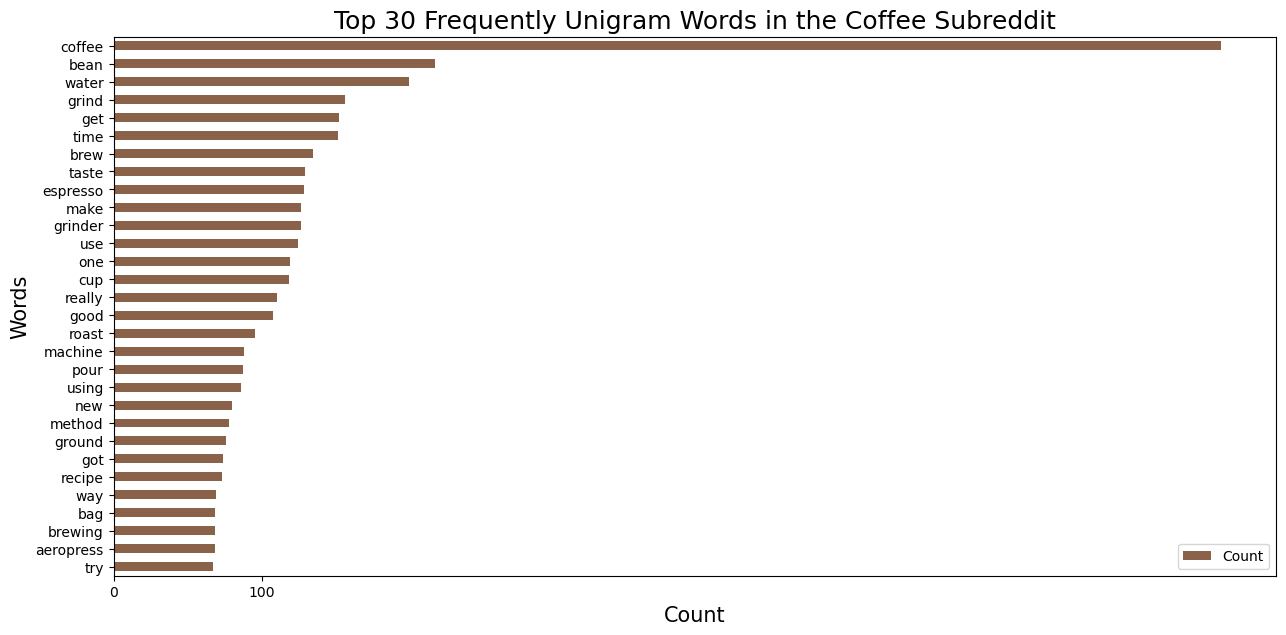

In [43]:
# visualize the top 30 unigram words in r/Coffee
coffee_top30_words = coffee_wordcount.head(30)

coffee_top30_words.sort_values(by = 'Count', 
                                  ascending = True).plot(kind = 'barh', 
                                                         color = '#8A624A', 
                                                         figsize = (15,7))

plt.xlabel('Count', fontsize = 15)
plt.ylabel('Words', fontsize = 15) 
plt.xticks(np.arange(0, 200, step = 100))

plt.title("Top 30 Frequently Unigram Words in the Coffee Subreddit", fontsize = 18); 

In [44]:
tea_wordcount = pd.DataFrame(data = word_counter(tea_df['lem_tokens']),
                               columns = ["Count"])

/usr/local/Caskroom/miniconda/base/envs/dsi-sg/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


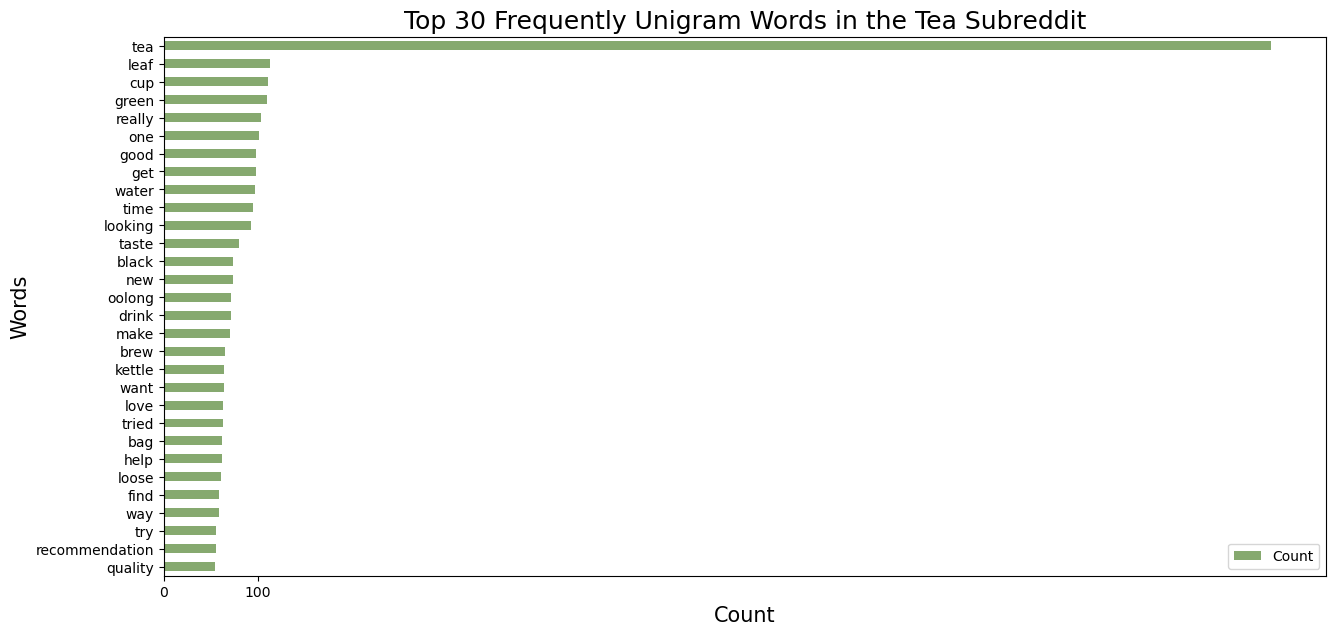

In [45]:
# similarly, visualize the top 30 unigram from r/tea
tea_top30_words = tea_wordcount.head(30)

tea_top30_words.sort_values(by = 'Count', 
                                  ascending = True).plot(kind = 'barh', 
                                                         color = '#86A96F', 
                                                         figsize = (15,7))

plt.xlabel('Count', fontsize = 15)
plt.ylabel('Words', fontsize = 15) 
plt.xticks(np.arange(0, 200, step = 100))

plt.title("Top 30 Frequently Unigram Words in the Tea Subreddit", fontsize = 18); 

**Observation**: 
1. Both 'coffee' and 'tea' has a strong influence in classifying the comments. But should we keep it? 
2. I think I can explore with bigrams, to understand the importance of this.
3. In the next few steps, I will explore the top 30 and bottom 30 bigrams

In [46]:
# write a function to construct a bigram
def word_counter_bigram(df):

    text = df.map(' '.join)
    
    cvec = CountVectorizer(ngram_range=(2,2))
    
    X = cvec.fit_transform(text)
    
    df = pd.DataFrame(X.toarray(), 
                       columns=cvec.get_feature_names())
    
    counts = df.sum().sort_values(ascending=False)
    
    return counts

In [47]:
word_counter_bigram(coffee_df['lem_tokens'])

/usr/local/Caskroom/miniconda/base/envs/dsi-sg/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


grind size            39
french press          38
light roast           30
james hoffman         20
coffee bean           20
                      ..
gear well              1
gearing system         1
gedeb yirgacheff       1
geisha contributes     1
zurich university      1
Length: 18088, dtype: int64

In [48]:
coffee_bigram = pd.DataFrame(data = word_counter_bigram(coffee_df['lem_tokens']),
                               columns = ["Count"])

/usr/local/Caskroom/miniconda/base/envs/dsi-sg/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [49]:
# construct top 30 bigrams
coffee_bigram_top30 = coffee_bigram.head(30)

In [50]:
# construct bottom 30 bigrams
coffee_bigram_bottom30 = coffee_bigram.tail(30)

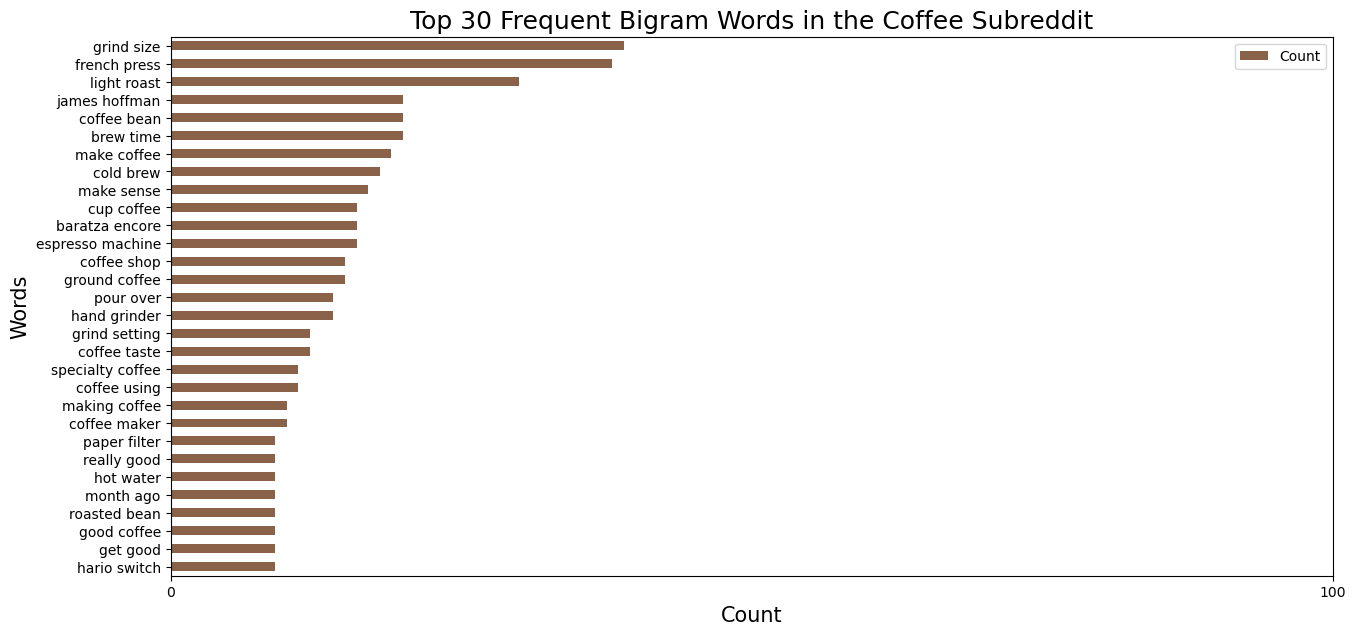

In [51]:
# create a visualization with the top 30 most frequent bigram
coffee_bigram_top30.sort_values(by = 'Count', 
                                  ascending = True).plot(kind = 'barh', 
                                                         color = '#8A624A', 
                                                         figsize = (15,7))

plt.xlabel('Count', fontsize = 15)
plt.ylabel('Words', fontsize = 15) 
plt.xticks(np.arange(0, 200, step = 100))

plt.title("Top 30 Frequent Bigram Words in the Coffee Subreddit", fontsize = 18); 

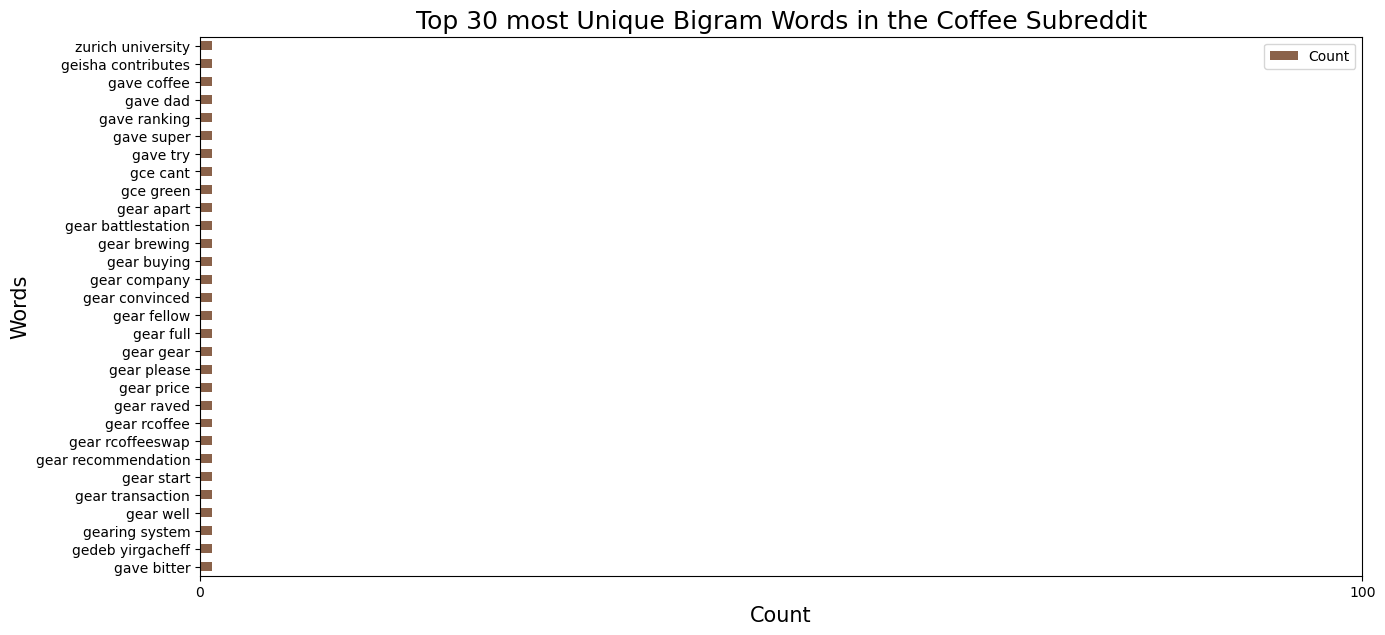

In [52]:
# create a visualization with the bottom 30 most frequent bigram
coffee_bigram_bottom30.sort_values(by = 'Count', 
                                  ascending = True).plot(kind = 'barh', 
                                                         color = '#8A624A', 
                                                         figsize = (15,7))

plt.xlabel('Count', fontsize = 15)
plt.ylabel('Words', fontsize = 15) 
plt.xticks(np.arange(0, 200, step = 100))

plt.title("Top 30 most Unique Bigram Words in the Coffee Subreddit", fontsize = 18); 

**A note on top 30 and bottom 30 bigrams for r/Coffee**:
1. Top 30 bigrams give a glimpse on what the subreddit users are looking at. There are:
    * Techniques - brew time, grind size
    * Styles of making coffee - cold brew, french press, pour over
    * Tools - espresso machines, hand grinder
    * [James Hoffman](https://en.wikipedia.org/wiki/James_Hoffmann) - renowned barista

2. Bottom 30 bigrams give a good sense on rare words such as [Gedeb Yigarcheff](https://www.roastmasters.com/ethiopia-yirg-worka-sakaro.html), which is an area that produces coffee beans

In [53]:
word_counter_bigram(tea_df['lem_tokens'])

/usr/local/Caskroom/miniconda/base/envs/dsi-sg/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


green tea         79
black tea         56
loose leaf        47
tea bag           33
earl grey         28
                  ..
guygal talk        1
gyokuro brewed     1
gyokuro gram       1
gyokuro green      1
大红袍from aunt       1
Length: 13800, dtype: int64

In [54]:
tea_bigram = pd.DataFrame(data = word_counter_bigram(tea_df['lem_tokens']),
                               columns = ["Count"])

/usr/local/Caskroom/miniconda/base/envs/dsi-sg/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [55]:
tea_bigram_top30 = tea_bigram.head(30)

In [56]:
tea_bigram_bottom30 = tea_bigram.tail(30)

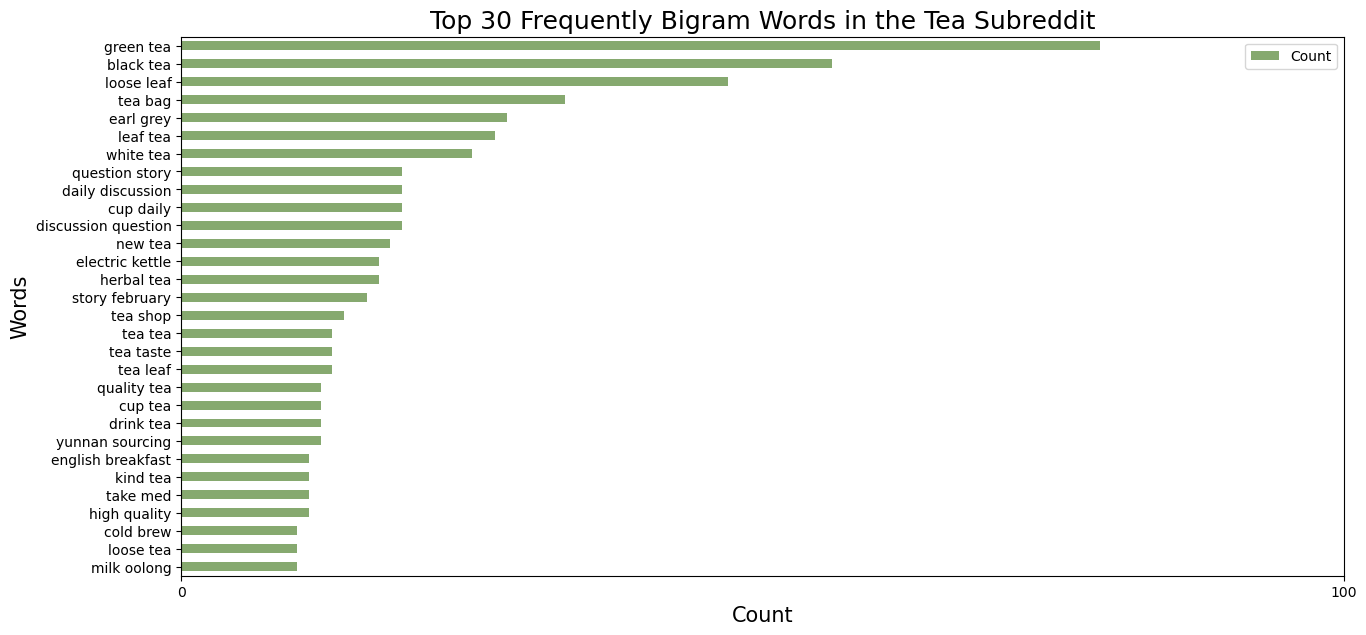

In [57]:
# create a visualisation from the top 30 bigram words
tea_bigram_top30.sort_values(by = 'Count', 
                                  ascending = True).plot(kind = 'barh', 
                                                         color = '#86A96F', 
                                                         figsize = (15,7))

plt.xlabel('Count', fontsize = 15)
plt.ylabel('Words', fontsize = 15) 
plt.xticks(np.arange(0, 200, step = 100))

plt.title("Top 30 Frequently Bigram Words in the Tea Subreddit", fontsize = 18); 

/usr/local/Caskroom/miniconda/base/envs/dsi-sg/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 22823 (\N{CJK UNIFIED IDEOGRAPH-5927}) missing from current font.
  func(*args, **kwargs)
/usr/local/Caskroom/miniconda/base/envs/dsi-sg/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 32418 (\N{CJK UNIFIED IDEOGRAPH-7EA2}) missing from current font.
  func(*args, **kwargs)
/usr/local/Caskroom/miniconda/base/envs/dsi-sg/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 34957 (\N{CJK UNIFIED IDEOGRAPH-888D}) missing from current font.
  func(*args, **kwargs)
/usr/local/Caskroom/miniconda/base/envs/dsi-sg/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 22823 (\N{CJK UNIFIED IDEOGRAPH-5927}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/Caskroom/miniconda/base/envs/dsi-sg/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 32418 (

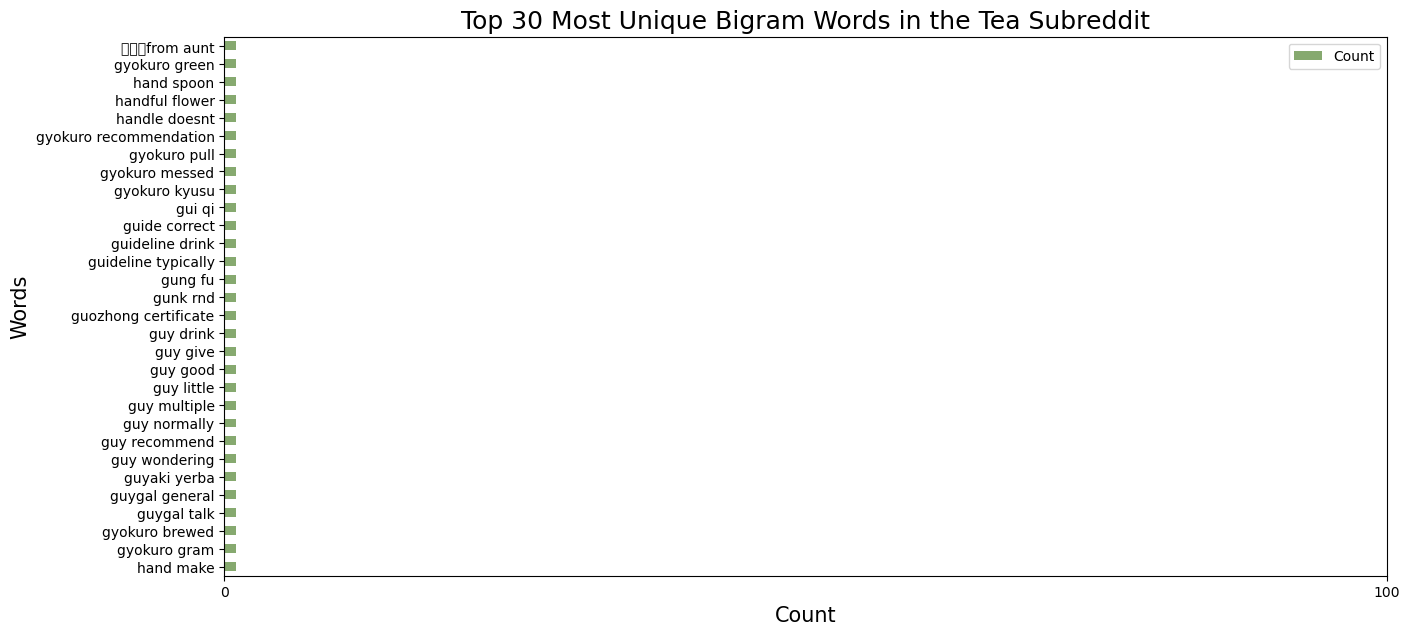

In [58]:
# create a visualisation on the bottom 30 words
tea_bigram_bottom30.sort_values(by = 'Count', 
                                  ascending = True).plot(kind = 'barh', 
                                                         color = '#86A96F', 
                                                         figsize = (15,7))

plt.xlabel('Count', fontsize = 15)
plt.ylabel('Words', fontsize = 15) 
plt.xticks(np.arange(0, 200, step = 100))

plt.title("Top 30 Most Unique Bigram Words in the Tea Subreddit", fontsize = 18); 

**A note on top 30 and bottom 30 bigrams for r/tea**:
1. Top 30 bigrams give a glimpse on what the subreddit users are looking at. I found that they are very 
    * Type of tea - green tea, black tea, Earl Grey, etc
    * Source for raw material - either from a place (Yunnan), or a shop
2. Bottom 30 bigrams gave a glimpse on the special characters from foreign language such as '八馬茶業', '台灣金萱紅茶', '氷出し', '謝謝', '이인수','大红袍'. 
    * These words are included in the stop words list
3. Also, the bottom 30 bigrams have a more niche way of drinking tea. These includes words such as 
    * gung fu (referring to a special Chinese cup for tea)
    * specific names of tea leaves : gyokuru, gui qi
4. This signals that tea drinkers has a wide range. A majority of users would look at loose leaves and consume by adding just water. But there is still a group of niche tea drinkers who are very particular about the type of leaves

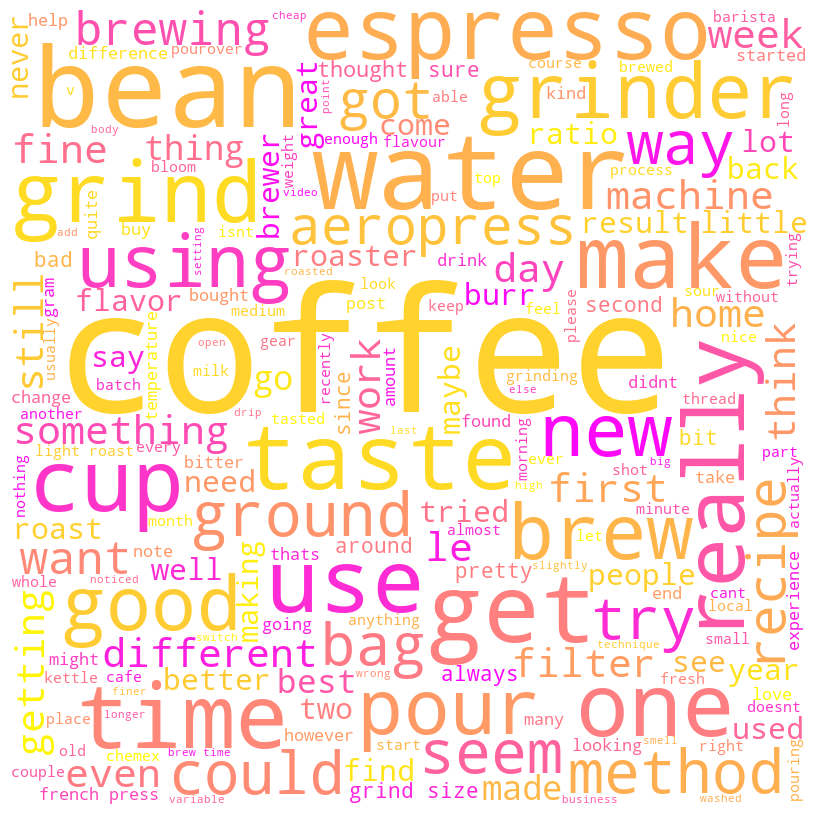

In [59]:
# create a word cloud from coffee document

comment_words = " "
stopwords = english_stopwords
 
# iterate through the csv file
for val in coffee_df['lem_tokens']:
     
    # typecaste each val to string
    val = str(val)
 
    tokens = re.findall(r'\b\w+\b', val)
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)
 
wordcloud = WordCloud(width = 800, height = 800,
                colormap="spring",
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

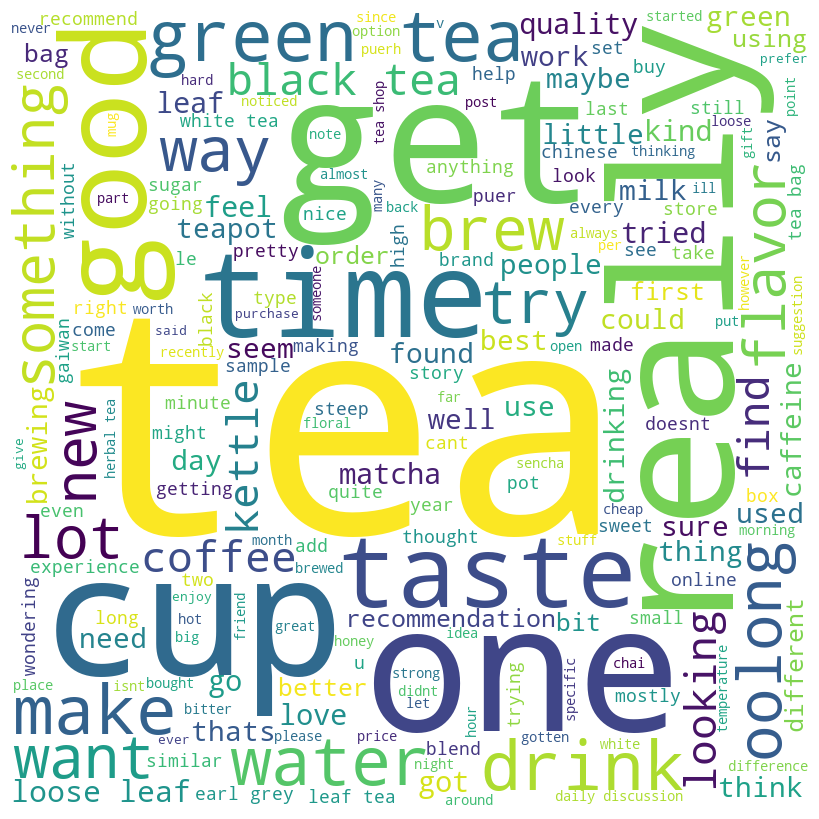

In [60]:
# create a word cloud from document in tea
comment_words = ""
stopwords = english_stopwords
 
# iterate through the csv file
for val in tea_df['lem_tokens']:
     
    # typecaste each val to string
    val = str(val)
 
    import re
    tokens = re.findall(r'\b\w+\b', val)
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

## 2.3 Merging data together
With the data cleaned, I save them in a dataframe for data modelling and machine learning 

In [61]:
# check for the number of columns for coffee_df and tea_df
coffee_df.shape

(1518, 7)

In [62]:
tea_df.shape

(1504, 7)

In [63]:
# merge coffee_df and tea_df
merged_df = pd.concat([coffee_df, tea_df], ignore_index = True)

In [64]:
merged_df['category'].value_counts()

# there are 1518 posts on coffee, and 1504 posts on tea. 
# this looks like a very balanced corpus

1    1518
0    1504
Name: category, dtype: int64

In [65]:
# check the merged_df
merged_df.shape

(3022, 7)

In [66]:
merged_df.head()

,index,message,category,clean_mesg,tokens,filtered_tokens,lem_tokens
0,0.0,[MOD] The Daily Question Thread,1,MOD The Daily Question Thread,"[mod, the, daily, question, thread]","[daily, thread]","[daily, thread]"
1,1.0,[MOD] What have you been brewing this week?/ Coffee bean recommendations,1,MOD What have you been brewing this week Coffee bean recommendations,"[mod, what, have, you, been, brewing, this, week, coffee, bean, recommendations]","[brewing, week, coffee, bean, recommendations]","[brewing, week, coffee, bean, recommendation]"
2,2.0,Aeromatic by Aeropress app,1,Aeromatic by Aeropress app,"[aeromatic, by, aeropress, app]","[aeromatic, aeropress, app]","[aeromatic, aeropress, app]"
3,3.0,"Squarespace tools make viewing, editing and selling on mobile simple.",1,Squarespace tools make viewing editing and selling on mobile simple,"[squarespace, tools, make, viewing, editing, and, selling, on, mobile, simple]","[squarespace, tools, make, viewing, editing, selling, mobile, simple]","[squarespace, tool, make, viewing, editing, selling, mobile, simple]"
4,4.0,Roasting An Espresso Blend For A Local Coffee Shop,1,Roasting An Espresso Blend For A Local Coffee Shop,"[roasting, an, espresso, blend, for, a, local, coffee, shop]","[roasting, espresso, blend, local, coffee, shop]","[roasting, espresso, blend, local, coffee, shop]"


In [67]:
# export this to a .csv file
merged_df.to_csv('./dataset/merged_df.csv', index=False)